# Gradient Descent

![Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lets create some random data points

In [2]:
X = np.linspace(10, 50, 10)
y = np.linspace(10, 50, 10)

In [3]:
X = X + np.random.randn(10)
y = y + np.random.randn(10)

##### Visualising the data we just created

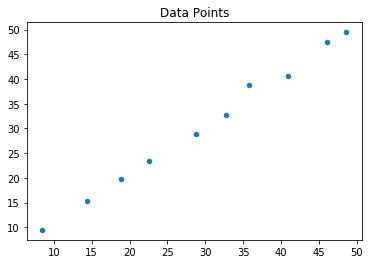

In [4]:
plt.scatter(X, y, s=20)
plt.title('Data Points')
plt.show()

## Regression

### Taking random slope and intercept to represent the Regression line

In [5]:
slope, intercept = np.random.randint(0, 10, 2)

##### Visualising the regression line

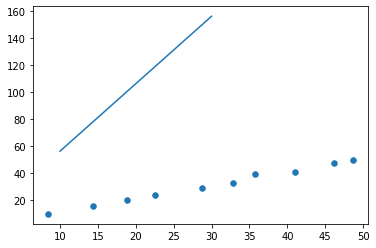

In [6]:
plt.scatter(X, y, s=30)
plt.plot(np.arange(10, 50, 20), (np.arange(10, 50, 20)*slope)+intercept)
plt.show()

As we can see, the random regression line is not a good fit for the data points. We will try to get a better fit using the `Gradient Descent` technique over multiple iterations

![](gd1.png)

##### In order to minimize our `Cost Function` we will use `Gradient Descent` technique.

##### We will start with randomly selecting some random value for slope and intercept, and then iteratively try to optimize the values for slope and intercept to minimize the cost function

![](gd2.png)

##### Since the cost is dependent upon two factors - slope and intercept, we need to study the descent along both these factors independently. Hence, gradient descent has to be done using partial differentiation, for both the factors.

##### Upon simplification, the above steps for optimizing `slope` and `intercept`, can be simplified to the following form:

![](https://miro.medium.com/max/563/1*8Omixzi4P2mnqdsPwIR1GQ.png)

### Python function to perform the above steps

In [7]:
def gradient_descent(slope, intercept, X, y, learning_rate):
    slope_sum = 0
    intercept_sum = 0
    
    for i in range(len(X)):
        slope_sum += -2 * X[i] * (y[i] - (slope * X[i] + intercept))
        intercept_sum += -2 * (y[i] - (slope * X[i] + intercept))
    
    slope -= learning_rate * (slope_sum/float(len(X)))
    intercept -= learning_rate * (intercept_sum/float(len(X)))
    
    return slope, intercept

### Optimization

Lets use gradient descent to minimize the cost of the regression line

##### Learning Rate

In [8]:
learning_rate = 0.0001

![Learning Rates](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In [9]:
new_slope, new_intercept = gradient_descent(slope, intercept, X, y, learning_rate)


message = """
Current Parameters                     Updated Parameters:
-------------------------              -------------------------
Slope        :  {:>8}               Slope      :  {:>8}
Intercept    :  {:>8}               Intercept  :  {:>8}

""".format(slope, round(new_slope, 2), intercept, round(new_intercept, 2))

print(message)


Current Parameters                     Updated Parameters:
-------------------------              -------------------------
Slope        :         5               Slope      :      4.13
Intercept    :         6               Intercept  :      5.98




##### Plotting the new line

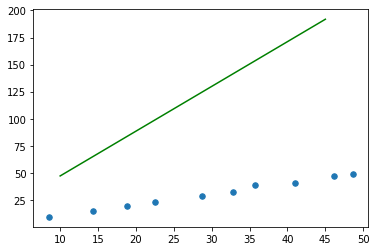

In [10]:
plt.scatter(X, y, s=30)
plt.plot(np.arange(10,50,5), (new_slope * np.arange(10,50,5))+new_intercept, c='g')
plt.show()
# plt.plot(np.arange(10,50,5), slope * np.arange(10,50,5) + intercept, c='b')

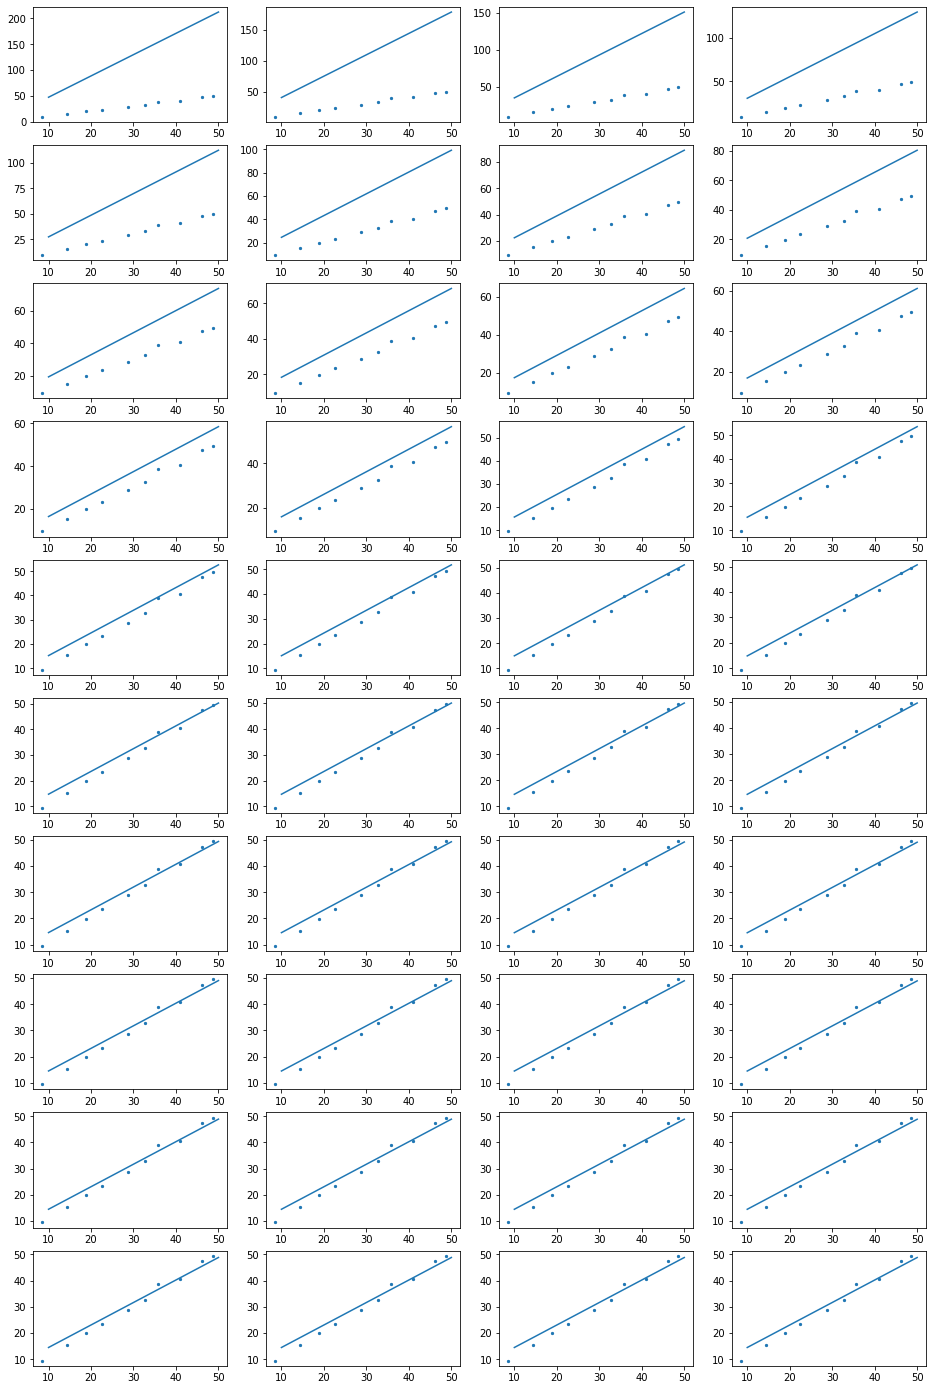

In [11]:
n_rows = 10
n_columns = 4

fig, ax = plt.subplots(n_rows, n_columns, figsize=(16,25), tight_layout=False)

s_temp = slope
i_temp = intercept

for i in range(n_rows):
    for j in range(n_columns):
        s_temp, i_temp = gradient_descent(s_temp, i_temp, X, y, learning_rate)
        ax[i][j].scatter(X, y, s=5)
        ax[i][j].plot(np.arange(10,51,5), np.arange(10,51,5)*s_temp+i_temp)

### As we can see, the gradient descent function is doing a good job in finding out the best set of parameters (slope and intercept) and optimizing the cost function.

### The new set of values will give a better fitting line.